# Выбор локации для скважины

Допустим, компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Шаги для выбора локации:

* В избранном регионе ищут месторождения, для каждого определяют значения признаков;
* Строят модель и оценивают объём запасов;
* Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
* Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных:**    

Данные геологоразведки трёх регионов находятся в файлах:     

id — уникальный идентификатор скважины;    
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);      
product — объём запасов в скважине (тыс. баррелей).    

**Условия задачи:**     
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.     

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## 1) Загрузка и подготовка данных:

In [1]:
import pandas as pd

import seaborn as sns

from math import sqrt

from scipy import stats as st

import matplotlib.pyplot as plt

from numpy.random import RandomState

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [2]:
data_0 = pd.read_csv('C://Users//smirn//Downloads//geo_data_0.csv')
data_1 = pd.read_csv('C://Users//smirn//Downloads//geo_data_1.csv')
data_2 = pd.read_csv('C://Users//smirn//Downloads//geo_data_2.csv')

### Первый датасет

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.duplicated().sum()

0

In [6]:
implicit_dupl = data_0.duplicated(subset=['id'])
data_0[implicit_dupl]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [7]:
data_0 = data_0.drop(data_0[implicit_dupl].index)
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [8]:
data_0 = data_0.reset_index(drop=True)
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


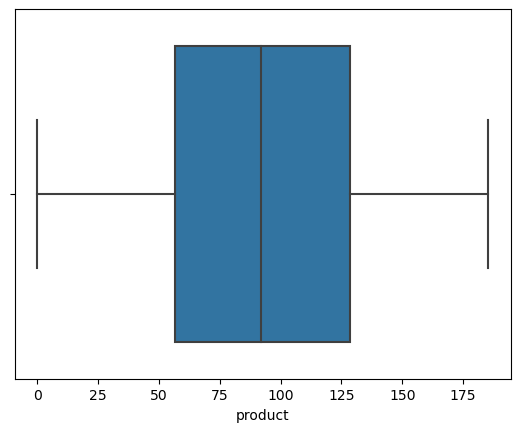

In [9]:
sns.boxplot(x=data_0['product']);

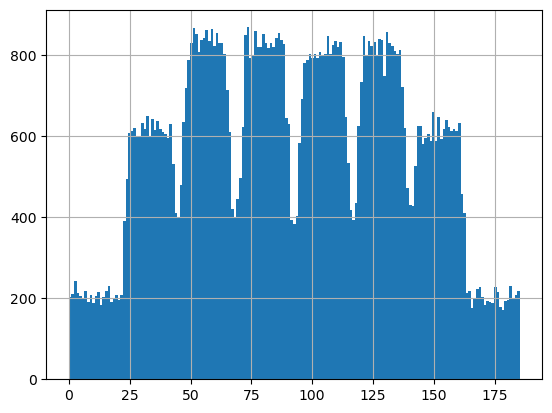

In [10]:
data_0['product'].hist(bins=175);

#### Датасет `data_0` загрузил: названия столбцов корректны, пропуски и явные дубликаты отсутствуют, типы данных изменять не нужно. Нашёл неявные дубликаты, удалил их и вернул правильную индексацию.

### Второй датасет

In [11]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_1.duplicated().sum()

0

In [14]:
implicit_dupl = data_1.duplicated(subset=['id'])
data_1[implicit_dupl]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [15]:
data_1 = data_1.drop(data_1[implicit_dupl].index)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [16]:
data_1 = data_1.reset_index(drop=True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


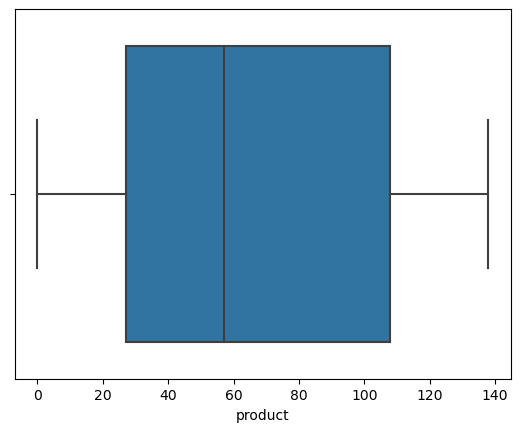

In [17]:
sns.boxplot(x=data_1['product']);

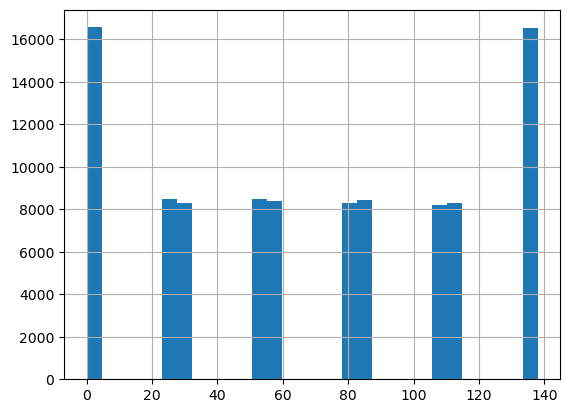

In [18]:
data_1['product'].hist(bins=30);

#### Датасет `data_1` загрузил: названия столбцов корректны, пропуски и явные дубликаты отсутствуют, типы данных изменять не нужно. Нашёл неявные дубликаты, удалил их и вернул правильную индексацию.

### Третий датасет

In [19]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [20]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [21]:
data_2.duplicated().sum()

0

In [22]:
implicit_dupl = data_2.duplicated(subset=['id'])
data_2[implicit_dupl]

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [23]:
data_2 = data_2.drop(data_2[implicit_dupl].index)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


In [24]:
data_2 = data_2.reset_index(drop=True)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99996 entries, 0 to 99995
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


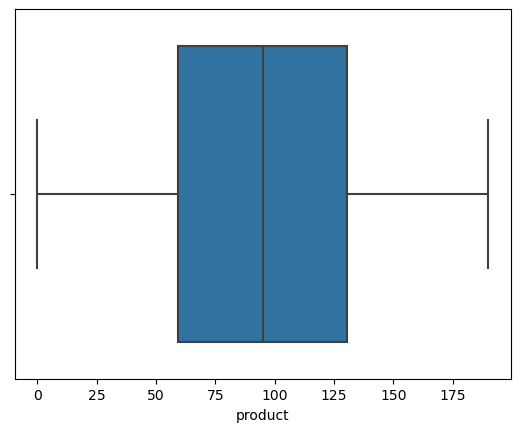

In [25]:
sns.boxplot(x=data_2['product']);

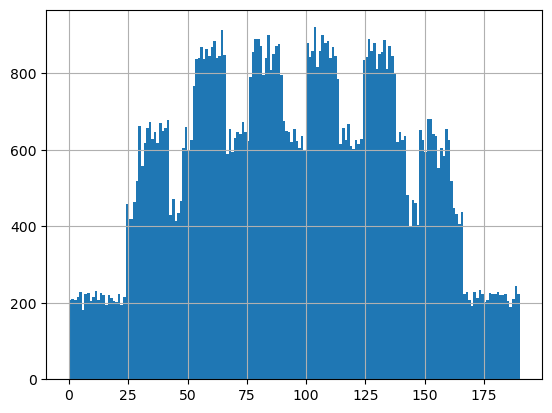

In [26]:
data_2['product'].hist(bins=175);

#### Датасет `data_2` загрузил: названия столбцов корректны, пропуски и явные дубликаты отсутствуют, типы данных изменять не нужно. Нашёл неявные дубликаты, удалил их и вернул правильную индексацию.

## 2)  Обучение и проверка модели

### 2.1. Разбиение данных на обучающую и валидационную выборки в соотношении 75:25.   

#### Первый датасет 

In [27]:
features_0 = data_0.drop(['id','product'], axis=1)
target_0 = data_0['product']

print(features_0.shape)
print(target_0.shape)

(99990, 3)
(99990,)


In [28]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=12345)

print(features_train_0.shape)
print(target_train_0.shape)
print()

print(features_valid_0.shape)
print(target_valid_0.shape)

(74992, 3)
(74992,)

(24998, 3)
(24998,)


#### Второй датасет 

In [29]:
features_1 = data_1.drop(['id','product'], axis=1)
target_1 = data_1['product']

print(features_1.shape)
print(target_1.shape)

(99996, 3)
(99996,)


In [30]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

print(features_train_1.shape)
print(target_train_1.shape)
print()

print(features_valid_1.shape)
print(target_valid_1.shape)

(74997, 3)
(74997,)

(24999, 3)
(24999,)


#### Третий датасет

In [31]:
features_2 = data_2.drop(['id','product'], axis=1)
target_2 = data_2['product']

print(features_2.shape)
print(target_2.shape)

(99996, 3)
(99996,)


In [32]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

print(features_train_2.shape)
print(target_train_2.shape)
print()

print(features_valid_2.shape)
print(target_valid_2.shape)

(74997, 3)
(74997,)

(24999, 3)
(24999,)


### 2.2. Обучение модели и предсказания на валидационной выборке.

#### Первый датасет

In [33]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_valid_0 = model_0.predict(features_valid_0)

predicted_valid_0

array([103.95037196,  73.6878687 , 101.01528767, ...,  78.44465303,
        71.08276801,  66.05485384])

In [34]:
features_valid_0['predict'] = predicted_valid_0

features_valid_0

,f0,f1,f2,predict
49466,0.073644,1.022011,6.064581,103.950372
55493,1.986176,0.274681,-1.152339,73.687869
11689,2.018384,-0.137280,2.085813,101.015288
13769,1.884278,0.335650,2.102482,94.048415
72389,1.102171,-0.514353,-0.209767,87.559552
...,...,...,...,...
7866,-0.765425,0.417309,-0.750885,63.963223
80669,0.814727,0.781915,10.552582,139.862730
45136,-0.200651,0.943633,2.212201,78.444653
53542,1.261902,-0.424739,-2.596798,71.082768


#### Второй датасет

In [35]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)

predicted_valid_1

array([ 53.40725544, 137.86345753,  29.7450034 , ...,  54.61142751,
       107.57873737,   1.96933801])

In [36]:
features_valid_1['predict'] = predicted_valid_1

features_valid_1

,f0,f1,f2,predict
71747,15.491360,-4.746353,1.999690,53.407255
80489,-8.840548,-6.894209,5.000913,137.863458
2655,-6.507568,-4.817448,1.003449,29.745003
71170,-3.001247,-3.916052,3.006016,83.188229
91137,6.090476,-4.494723,0.013815,1.242101
...,...,...,...,...
18456,-8.363585,-6.357527,3.995592,110.688350
73031,7.010099,-0.922511,3.007631,81.716127
54709,5.394073,1.144032,1.994925,54.611428
50910,13.112594,-1.695908,3.999411,107.578737


#### Третий датасет

In [37]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)

predicted_valid_2

array([ 76.45756504, 109.41709375,  89.9226202 , ...,  62.36724943,
       114.19081382,  86.99880426])

In [38]:
features_valid_2['predict'] = predicted_valid_2

features_valid_2

,f0,f1,f2,predict
71747,1.953202,-1.826540,-0.757681,76.457565
80489,0.875958,1.023876,4.992700,109.417094
2655,-4.587649,-0.413199,1.649268,89.922620
71170,1.446205,0.096865,0.522497,83.701818
91137,0.058073,0.622573,1.070673,86.761173
...,...,...,...,...
18456,0.015144,0.876998,2.603666,95.591732
73031,-0.874542,-1.634159,5.449535,112.126588
54709,-0.888306,-1.482723,-3.169498,62.367249
50910,0.736339,0.335701,5.813655,114.190814


### 2.3. Средний запас предсказанного сырья и RMSE модели.

#### Первый датасет

In [39]:
predicted_valid_0.mean()

92.78915638280621

In [40]:
print('RMSE модели равно:', sqrt(mean_squared_error(target_valid_0, predicted_valid_0)))

RMSE модели равно: 37.853527328872964


#### Второй датасет

In [41]:
predicted_valid_1.mean()

69.1783195703043

In [42]:
print('RMSE модели равно:', sqrt(mean_squared_error(target_valid_1, predicted_valid_1)))

RMSE модели равно: 0.8920592647717033


#### Третий датасет

In [43]:
predicted_valid_2.mean()

94.86572480562035

In [44]:
print('RMSE модели равно:', sqrt(mean_squared_error(target_valid_2, predicted_valid_2)))

RMSE модели равно: 40.07585073246016


### 2.4. Анализ результатов.

**В тетьем регионе предсказанный целевой признак имеет наибольшее среднее значение, но и наибольшее значение средней квадратичной ошибки.    
В первом оба показателя немного меньше.    
Во втором среднее предсказанного признака меньше практически на треть, но и средняя квадратичная ошибка минимальна.**

## 3) Подготовка к расчёту прибыли:

In [45]:
num_point_samp = 500
num_skv = 200
budg = 10e9
per_prod = 450000

###  3.1. Рассчёт достаточного объёма сырья для безубыточной разработки новой скважины. Сравнение полученного объём сырья со средним запасом в каждом регионе. 

In [46]:
min_value_prod_per_skv = (budg/num_skv)/per_prod
min_value_prod_per_skv

111.11111111111111

#### Первый регион

In [47]:
target_valid_0.mean() - min_value_prod_per_skv

-18.952906201710192

#### Второй регион

In [48]:
target_valid_1.mean() - min_value_prod_per_skv

-41.92506710151925

#### Третий регион

In [49]:
target_valid_2.mean() - min_value_prod_per_skv

-16.326001757418894

**Средний запас в каждом регионе меньше достаточного объёма. Больше всего разница во втором регионе.  
Но это не значит, что ни один регион не подходит, так как меньше достаточного только среднее.**

## 4) Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [50]:
def profit_from_selected_skv(sample, num_skv, per_prod, budg):
    skv_select = sample.sort_values(by='predict').tail(num_skv)
    skv_select_prod_sum = skv_select['product'].sum()
    skv_select_profit = (skv_select_prod_sum * per_prod) - budg
    return skv_select_profit

Функция осуществляет:     
- выбор скважины с максимальными значениями предсказаний;    
- суммирование целевого значения объёма сырья, соответствующее этим предсказаниям;
- рассчёт прибыли для полученного объёма сырья.

## 5) Рассчёт рисков и прибыли для каждого региона:

### 5.1. Применение техники Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [51]:
state = RandomState(12345)

#### Первый регион:

In [52]:
valid_0 = features_valid_0.copy()
valid_0

,f0,f1,f2,predict
49466,0.073644,1.022011,6.064581,103.950372
55493,1.986176,0.274681,-1.152339,73.687869
11689,2.018384,-0.137280,2.085813,101.015288
13769,1.884278,0.335650,2.102482,94.048415
72389,1.102171,-0.514353,-0.209767,87.559552
...,...,...,...,...
7866,-0.765425,0.417309,-0.750885,63.963223
80669,0.814727,0.781915,10.552582,139.862730
45136,-0.200651,0.943633,2.212201,78.444653
53542,1.261902,-0.424739,-2.596798,71.082768


In [53]:
valid_0['product'] = target_valid_0
valid_0

,f0,f1,f2,predict,product
49466,0.073644,1.022011,6.064581,103.950372,123.566299
55493,1.986176,0.274681,-1.152339,73.687869,63.442039
11689,2.018384,-0.137280,2.085813,101.015288,88.718000
13769,1.884278,0.335650,2.102482,94.048415,51.422060
72389,1.102171,-0.514353,-0.209767,87.559552,102.569999
...,...,...,...,...,...
7866,-0.765425,0.417309,-0.750885,63.963223,32.531740
80669,0.814727,0.781915,10.552582,139.862730,139.062332
45136,-0.200651,0.943633,2.212201,78.444653,55.953481
53542,1.261902,-0.424739,-2.596798,71.082768,87.222042


In [54]:
distr_prof_0 = []

for i in range(1000):
    sample_skv = valid_0.sample(500, replace=True, random_state=state)
    distr_prof_0.append(profit_from_selected_skv(sample_skv, num_skv, per_prod, budg))

len(distr_prof_0)

1000

#### Второй регион:

In [55]:
valid_1 = features_valid_1.copy()
valid_1

,f0,f1,f2,predict
71747,15.491360,-4.746353,1.999690,53.407255
80489,-8.840548,-6.894209,5.000913,137.863458
2655,-6.507568,-4.817448,1.003449,29.745003
71170,-3.001247,-3.916052,3.006016,83.188229
91137,6.090476,-4.494723,0.013815,1.242101
...,...,...,...,...
18456,-8.363585,-6.357527,3.995592,110.688350
73031,7.010099,-0.922511,3.007631,81.716127
54709,5.394073,1.144032,1.994925,54.611428
50910,13.112594,-1.695908,3.999411,107.578737


In [56]:
valid_1['product'] = target_valid_1
valid_1

,f0,f1,f2,predict,product
71747,15.491360,-4.746353,1.999690,53.407255,53.906522
80489,-8.840548,-6.894209,5.000913,137.863458,137.945408
2655,-6.507568,-4.817448,1.003449,29.745003,30.132364
71170,-3.001247,-3.916052,3.006016,83.188229,84.038886
91137,6.090476,-4.494723,0.013815,1.242101,0.000000
...,...,...,...,...,...
18456,-8.363585,-6.357527,3.995592,110.688350,110.992147
73031,7.010099,-0.922511,3.007631,81.716127,80.859783
54709,5.394073,1.144032,1.994925,54.611428,53.906522
50910,13.112594,-1.695908,3.999411,107.578737,107.813044


In [57]:
distr_prof_1 = []

for i in range(1000):
    sample_skv = valid_1.sample(500, replace=True, random_state=state)
    distr_prof_1.append(profit_from_selected_skv(sample_skv, num_skv, per_prod, budg))

len(distr_prof_1)

1000

#### Третий регион:

In [58]:
valid_2 = features_valid_2.copy()
valid_2

,f0,f1,f2,predict
71747,1.953202,-1.826540,-0.757681,76.457565
80489,0.875958,1.023876,4.992700,109.417094
2655,-4.587649,-0.413199,1.649268,89.922620
71170,1.446205,0.096865,0.522497,83.701818
91137,0.058073,0.622573,1.070673,86.761173
...,...,...,...,...
18456,0.015144,0.876998,2.603666,95.591732
73031,-0.874542,-1.634159,5.449535,112.126588
54709,-0.888306,-1.482723,-3.169498,62.367249
50910,0.736339,0.335701,5.813655,114.190814


In [59]:
valid_2['product'] = target_valid_2
valid_2

,f0,f1,f2,predict,product
71747,1.953202,-1.826540,-0.757681,76.457565,97.651721
80489,0.875958,1.023876,4.992700,109.417094,66.640660
2655,-4.587649,-0.413199,1.649268,89.922620,57.776581
71170,1.446205,0.096865,0.522497,83.701818,35.055066
91137,0.058073,0.622573,1.070673,86.761173,82.047594
...,...,...,...,...,...
18456,0.015144,0.876998,2.603666,95.591732,21.431303
73031,-0.874542,-1.634159,5.449535,112.126588,155.104522
54709,-0.888306,-1.482723,-3.169498,62.367249,28.534893
50910,0.736339,0.335701,5.813655,114.190814,41.027981


In [60]:
distr_prof_2 = []

for i in range(1000):
    sample_skv = valid_2.sample(500, replace=True, random_state=state)
    distr_prof_2.append(profit_from_selected_skv(sample_skv, num_skv, per_prod, budg))

len(distr_prof_2)

1000

### 5.2. Нахождение средней прибыли, 95%-й доверительного интервала и риска убытков. Убыток — это отрицательная прибыль.

#### Первый регион:

In [61]:
distr_prof_0 = pd.Series(distr_prof_0)

In [62]:
prof_mean_0 = distr_prof_0.mean()
print('Средняя прибыль:', prof_mean_0)

Средняя прибыль: 380613470.01759744


In [63]:
alpha = 0.05

confidence_interval_0 = st.t.interval(alpha, len(distr_prof_0)-1, loc=prof_mean_0, scale=distr_prof_0.sem())
print('95%-й доверительный интервал:', confidence_interval_0)

95%-й доверительный интервал: (380100371.05405056, 381126568.9811443)


In [64]:
risk_loss_0 = sum(distr_prof_0 < 0) / len(distr_prof_0)
print('Риск убытков:', risk_loss_0)

Риск убытков: 0.077


#### Второй регион:

In [65]:
distr_prof_1 = pd.Series(distr_prof_1)

In [66]:
prof_mean_1 = distr_prof_1.mean()
print('Средняя прибыль:', prof_mean_1)

Средняя прибыль: 479159869.9815875


In [67]:
alpha = 0.05

confidence_interval_1 = st.t.interval(alpha, len(distr_prof_1)-1, loc=prof_mean_1, scale=distr_prof_1.sem())
print('95%-й доверительный интервал:', confidence_interval_1)

95%-й доверительный интервал: (478752165.11858827, 479567574.8445868)


In [68]:
risk_loss_1 = sum(distr_prof_1 < 0) / len(distr_prof_1)
print('Риск убытков:', risk_loss_1)

Риск убытков: 0.006


#### Третий регион

In [69]:
distr_prof_2 = pd.Series(distr_prof_2)

In [70]:
prof_mean_2 = distr_prof_2.mean()
print('Средняя прибыль:', prof_mean_2)

Средняя прибыль: 315441916.02349013


In [71]:
alpha = 0.05

confidence_interval_2 = st.t.interval(alpha, len(distr_prof_2)-1, loc=prof_mean_2, scale=distr_prof_2.sem())
print('95%-й доверительный интервал:', confidence_interval_2)

95%-й доверительный интервал: (314909935.86283004, 315973896.1841502)


In [72]:
risk_loss_2 = sum(distr_prof_2 < 0) / len(distr_prof_2)
print('Риск убытков:', risk_loss_2)

Риск убытков: 0.124


Лучший выбор региона для разработки - второй. Он показал лучшее значение средней прибыли и 95%-го интервала, а риск убытков всего 0.6%

## Вывод

У нас было три датасета с данным по трём регионам.  
Я загрузил датасеты, удалил неявные дубликаты, посмотрел распределение по целевому признаку в каждом регионе.  
Разбил датасеты на обучающую и валидационную выборки.  
Обучил модели линейной регрессии и получил предсказания по каждому региону.  
Посчитал средний запас предсказанного сырья и RMSE модели для трёх датасетов.  
Средний запас в каждом регионе меньше достаточного объёма. Больше всего разница во втором регионе.  
Но это не значит, что ни один регион не подходит, так как меньше достаточного только среднее.  
Посчитал достаточный объем сырья для безубыточной разработки новой скважины.   
Применил технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли для каждого региона.
Для всех регионов посчитали среднюю прибыль, 95%-й доверительной и риск убытков.
Лучший выбор региона для разработки - второй. Он показал лучшее значение средней прибыли и 95%-го интервала, а риск убытков всего 0.6%